In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

In [71]:
data_path = '/Users/jk1/temp/resilience_part2/atttacks/simplified_delta_eglob_auc_post_attack.xlsx'

In [72]:
patient_data = pd.read_excel(data_path, sheet_name='patients')
control_data = pd.read_excel(data_path, sheet_name='controls')

In [73]:
patient_data.rename(columns={'WITHOUT 0': 'id'}, inplace=True)
patient_data.rename(columns={'sTP1- aTP1 ': 'TP1', 'sTP2-aTP2': 'TP2', 'sTP3-aTP3':'TP3'}, inplace=True)

In [74]:
control_data.rename(columns={'WITHOUT 0': 'id'}, inplace=True)
control_data.rename(columns={'sTP1- aTP1 ': 'TP1', 'sTP2-aTP2': 'TP2'}, inplace=True)

In [76]:
patient_data.describe()

,attack,TP1,TP2,TP3
count,8985.000000,8985.000000,8985.000000,7205.000000
mean,61.675793,0.000354,0.000354,0.000399
std,35.434236,0.001056,0.001013,0.001062
min,1.000000,-0.015321,-0.020265,-0.010070
25%,31.000000,-0.000112,-0.000100,-0.000077
50%,62.000000,0.000185,0.000192,0.000208
75%,92.000000,0.000708,0.000683,0.000734
max,123.000000,0.010819,0.009297,0.011882


In [77]:
control_data.describe()

,attack,TP1,TP2
count,2196.000000,2196.000000,2196.000000
mean,61.655738,0.000409,0.000400
std,35.454123,0.000911,0.000975
min,1.000000,-0.003112,-0.005171
25%,31.000000,-0.000049,-0.000051
50%,61.500000,0.000229,0.000203
75%,92.000000,0.000732,0.000701
max,123.000000,0.006317,0.008879


# Normalise data by overall control median

In [78]:
control_data_median_TP1 = control_data['TP1'].median()

In [79]:
# normalize all patient timepoints by: 1 - (patient delta /  control median)
patient_data['nTP1'] = 1 - (patient_data['TP1'] / control_data_median_TP1)
patient_data['nTP2'] = 1 - (patient_data['TP2'] / control_data_median_TP1)
patient_data['nTP3'] = 1 - (patient_data['TP3'] / control_data_median_TP1)

In [80]:
# normalize control data by: 1 - (control delta /  control median)
control_data['c_nTP1'] = 1 - (control_data['TP1'] / control_data_median_TP1)
control_data['c_nTP2'] = 1 - (control_data['TP2'] / control_data_median_TP1)

In [82]:
patient_data.describe()

,attack,TP1,TP2,TP3,nTP1,nTP2,nTP3
count,8985.000000,8985.000000,8985.000000,7205.000000,8985.000000,8985.000000,7205.000000
mean,61.675793,0.000354,0.000354,0.000399,-0.547487,-0.545148,-0.745195
std,35.434236,0.001056,0.001013,0.001062,4.615980,4.428427,4.639363
min,1.000000,-0.015321,-0.020265,-0.010070,-46.280430,-39.627295,-50.926415
25%,31.000000,-0.000112,-0.000100,-0.000077,-2.094449,-1.986064,-2.208825
50%,62.000000,0.000185,0.000192,0.000208,0.193301,0.162812,0.090698
75%,92.000000,0.000708,0.000683,0.000734,1.490050,1.438045,1.335391
max,123.000000,0.010819,0.009297,0.011882,67.954039,89.558412,45.007476


Text(0.5, 1.0, 'Normalised delta eGlob AUC (1 - (delta / control median))')

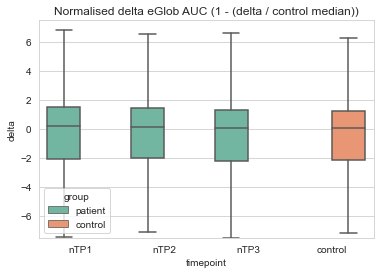

In [90]:
# plot normalised patient and control data

temp = pd.melt(patient_data[['nTP1', 'nTP2', 'nTP3']], var_name='timepoint', value_name='delta')
temp['group'] = 'patient'
temp2 = pd.melt(control_data[['c_nTP1', 'c_nTP2']], var_name='timepoint', value_name='delta')
temp2['timepoint'] = 'control'
temp2 = temp2
temp2['group'] = 'control'
temp = temp.append(temp2)

ax = sns.boxplot(x='timepoint', y='delta', hue='group', data=temp, showfliers=False, palette='Set2')

ax.set_ylim([-7.5, 7.5])

ax.set_title('Normalised delta eGlob AUC (1 - (delta / control median))')


# Normalise data by overall control mean 

In [91]:
control_data_mean_TP1 = control_data['TP1'].mean()

In [92]:
# normalize all patient timepoints by: 1 - (patient delta /  control mean)
patient_data['nTP1'] = 1 - (patient_data['TP1'] / control_data_mean_TP1)
patient_data['nTP2'] = 1 - (patient_data['TP2'] / control_data_mean_TP1)
patient_data['nTP3'] = 1 - (patient_data['TP3'] / control_data_mean_TP1)

In [93]:
control_data['c_nTP1'] = 1 - (control_data['TP1'] / control_data_mean_TP1)

Text(0.5, 1.0, 'Normalised delta eGlob AUC (1 - (delta / control mean))')

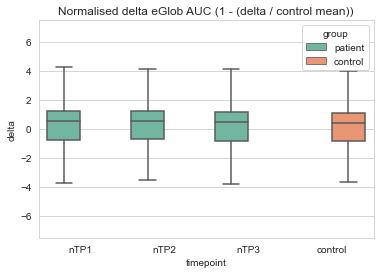

In [94]:
# plot normalised patient and control data

temp = pd.melt(patient_data[['nTP1', 'nTP2', 'nTP3']], var_name='timepoint', value_name='delta')
temp['group'] = 'patient'
temp2 = pd.melt(control_data[['c_nTP1']], var_name='timepoint', value_name='delta')
temp2['timepoint'] = 'control'
temp2 = temp2
temp2['group'] = 'control'
temp = temp.append(temp2)

ax = sns.boxplot(x='timepoint', y='delta', hue='group', data=temp, showfliers=False, palette='Set2')

ax.set_ylim([-7.5, 7.5])

ax.set_title('Normalised delta eGlob AUC (1 - (delta / control mean))')

# Normalise data by attack-specific control median

In [95]:
# for every patient, find the median of the control data for the same attack and normalise so as normalised = 1 - (patient delta /  control median)

patient_data['anTP1'] = patient_data.apply(lambda row: 1 - (row['TP1'] / np.median(control_data[control_data['attack'] == row['attack']]['TP1'].values)), axis=1)
patient_data['anTP2'] = patient_data.apply(lambda row: 1 - (row['TP2'] / np.median(control_data[control_data['attack'] == row['attack']]['TP1'].values)), axis=1)
patient_data['anTP3'] = patient_data.apply(lambda row: 1 - (row['TP3'] / np.median(control_data[control_data['attack'] == row['attack']]['TP1'].values)), axis=1)

In [96]:
control_data['anTP1'] = control_data.apply(lambda row: 1 - (row['TP1'] / np.median(control_data[control_data['attack'] == row['attack']]['TP1'].values)), axis=1)

Text(0.5, 1.0, 'Normalised delta eGlob AUC (1 - (delta / attack-specific control median))')

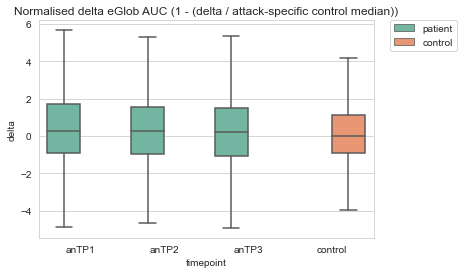

In [98]:
# plot attack-specific normalised patient and control data

temp = pd.melt(patient_data[['anTP1', 'anTP2', 'anTP3']], var_name='timepoint', value_name='delta')
temp['group'] = 'patient'
temp2 = pd.melt(control_data[['anTP1']], var_name='timepoint', value_name='delta')
temp2['timepoint'] = 'control'
temp2 = temp2
temp2['group'] = 'control'
temp = temp.append(temp2)

ax = sns.boxplot(x='timepoint', y='delta', hue='group', data=temp, showfliers=False, palette='Set2')

# position legend outside (top right)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_title('Normalised delta eGlob AUC (1 - (delta / attack-specific control median))')


# Normalise data by attack-specific control mean

In [99]:
# for every patient, find the mean of the control data for the same attack and normalise so as normalised = 1 - (patient delta /  control mean)

patient_data['anTP1'] = patient_data.apply(lambda row: 1 - (row['TP1'] / np.mean(control_data[control_data['attack'] == row['attack']]['TP1'].values)), axis=1)
patient_data['anTP2'] = patient_data.apply(lambda row: 1 - (row['TP2'] / np.mean(control_data[control_data['attack'] == row['attack']]['TP1'].values)), axis=1)
patient_data['anTP3'] = patient_data.apply(lambda row: 1 - (row['TP3'] / np.mean(control_data[control_data['attack'] == row['attack']]['TP1'].values)), axis=1)

control_data['anTP1'] = control_data.apply(lambda row: 1 - (row['TP1'] / np.mean(control_data[control_data['attack'] == row['attack']]['TP1'].values)), axis=1)

Text(0.5, 1.0, 'Normalised delta eGlob AUC (1 - (delta / attack-specific control mean))')

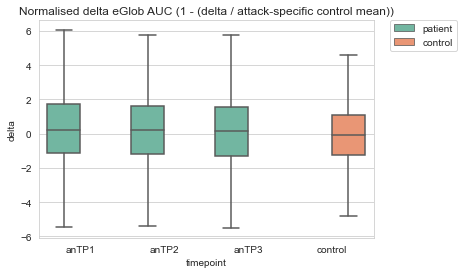

In [100]:
# plot attack-specific normalised patient and control data

temp = pd.melt(patient_data[['anTP1', 'anTP2', 'anTP3']], var_name='timepoint', value_name='delta')
temp['group'] = 'patient'
temp2 = pd.melt(control_data[['anTP1']], var_name='timepoint', value_name='delta')
temp2['timepoint'] = 'control'
temp2 = temp2
temp2['group'] = 'control'
temp = temp.append(temp2)

ax = sns.boxplot(x='timepoint', y='delta', hue='group', data=temp, showfliers=False, palette='Set2')

# position legend outside (top right)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_title('Normalised delta eGlob AUC (1 - (delta / attack-specific control mean))')

# Normalise data by attack-specific control median but preserve signs

-1 * (deltaP - mean(deltaC)) / std(deltaC)

In [103]:
control_means_by_attack = control_data.groupby('attack')['TP1'].mean()
control_means_by_attack.name = 'control_mean'

control_sd_by_attack = control_data.groupby('attack')['TP1'].std()
control_sd_by_attack.name = 'control_sd'

patient_data = patient_data.join(control_means_by_attack, on='attack')
patient_data = patient_data.join(control_sd_by_attack, on='attack')

patient_data['delta_to_control_mean'] = patient_data['TP1'] - patient_data['control_mean']

In [104]:
patient_data['ansTP1'] = patient_data.apply(lambda row: -1 * (row['TP1'] - row['control_mean']) / row['control_sd'], axis=1)
patient_data['ansTP2'] = patient_data.apply(lambda row: -1 * (row['TP2'] - row['control_mean']) / row['control_sd'], axis=1)
patient_data['ansTP3'] = patient_data.apply(lambda row: -1 * (row['TP3'] - row['control_mean']) / row['control_sd'], axis=1)

control_data['ansTP1'] = control_data.apply(lambda row: -1 * (row['TP1'] - np.mean(control_data[control_data['attack'] == row['attack']]['TP1'].values)) / np.std(control_data[control_data['attack'] == row['attack']]['TP1'].values), axis=1)

In [105]:
patient_data[['ansTP1', 'ansTP2', 'ansTP3']].describe()

,ansTP1,ansTP2,ansTP3
count,8985.000000,8985.000000,7205.000000
mean,0.124473,0.106065,0.041187
std,1.326200,1.292535,1.316732
min,-8.363473,-12.357285,-6.885617
25%,-0.677853,-0.649513,-0.717453
50%,0.040294,0.051855,0.006012
75%,0.813672,0.813241,0.743849
max,9.524194,10.974757,9.244756


In [106]:
control_data[['ansTP1']].describe()

,ansTP1
count,2.196000e+03
mean,1.294249e-17
std,1.000228e+00
min,-3.062298e+00
25%,-6.861370e-01
50%,-3.933893e-02
75%,6.472317e-01
max,3.118828e+00


Text(0.5, 1.0, 'Signed normalised delta eGlob AUC (-1 * (delta - attack-specific control mean) / attack-specific control std)')

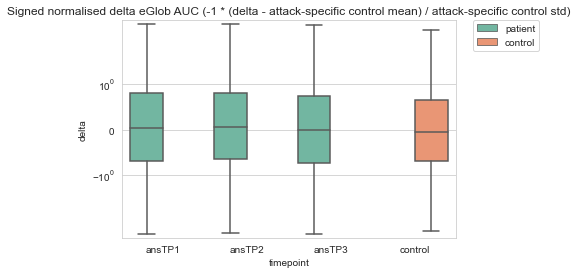

In [108]:
# plot attack-specific signed normalised patient and control data

temp = pd.melt(patient_data[['ansTP1', 'ansTP2', 'ansTP3']], var_name='timepoint', value_name='delta')
temp['group'] = 'patient'
temp2 = pd.melt(control_data[['ansTP1']], var_name='timepoint', value_name='delta')
temp2['timepoint'] = 'control'
temp2 = temp2
temp2['group'] = 'control'
temp = temp.append(temp2)

ax = sns.boxplot(x='timepoint', y='delta', hue='group', data=temp, showfliers=False, palette='Set2')

# position legend outside (top right)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_yscale('symlog')

ax.set_title('Signed normalised delta eGlob AUC (-1 * (delta - attack-specific control mean) / attack-specific control std)')